In [50]:
import json  
import pandas as pd
import Utilities
import copy as cp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.interpolate import interp1d
import seaborn as sns
import scipy.stats as stats
import matplotlib.gridspec as gridspec

In [2]:
with open("/Users/Mattia/Desktop/PAPER2/subjNames.txt", "r") as f:
    subjNames = f.read().splitlines()
with open("/Users/Mattia/Desktop/PAPER2/problemList.txt", "r") as f:
    problemList = f.read().splitlines()
with open("/Users/Mattia/Desktop/PAPER2/graphNodeIdDict.json", "r") as f:
    graphNodeIdDict = json.load(f)
mapPath ="/Users/Mattia/Desktop/EYE_TRACKER/MAPS/"

In [3]:
subjName = subjNames[0]
df = pd.read_csv("/Users/Mattia/Desktop/PAPER2/COARTICULATION/OUTPUT/" + subjName +"dfSampleVis.csv", low_memory=False)

In [4]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

### COMPUTE DISTANCE EYE HAND

In [15]:
TRIAL_INDEX = 56
problem = df[df.TRIAL_INDEX == TRIAL_INDEX].MAPNAME.iloc[0]
g = Utilities.map_load(mapPath + problem)
nodeIndexes ={node: index for index, node in enumerate(list(g.nodes()))}

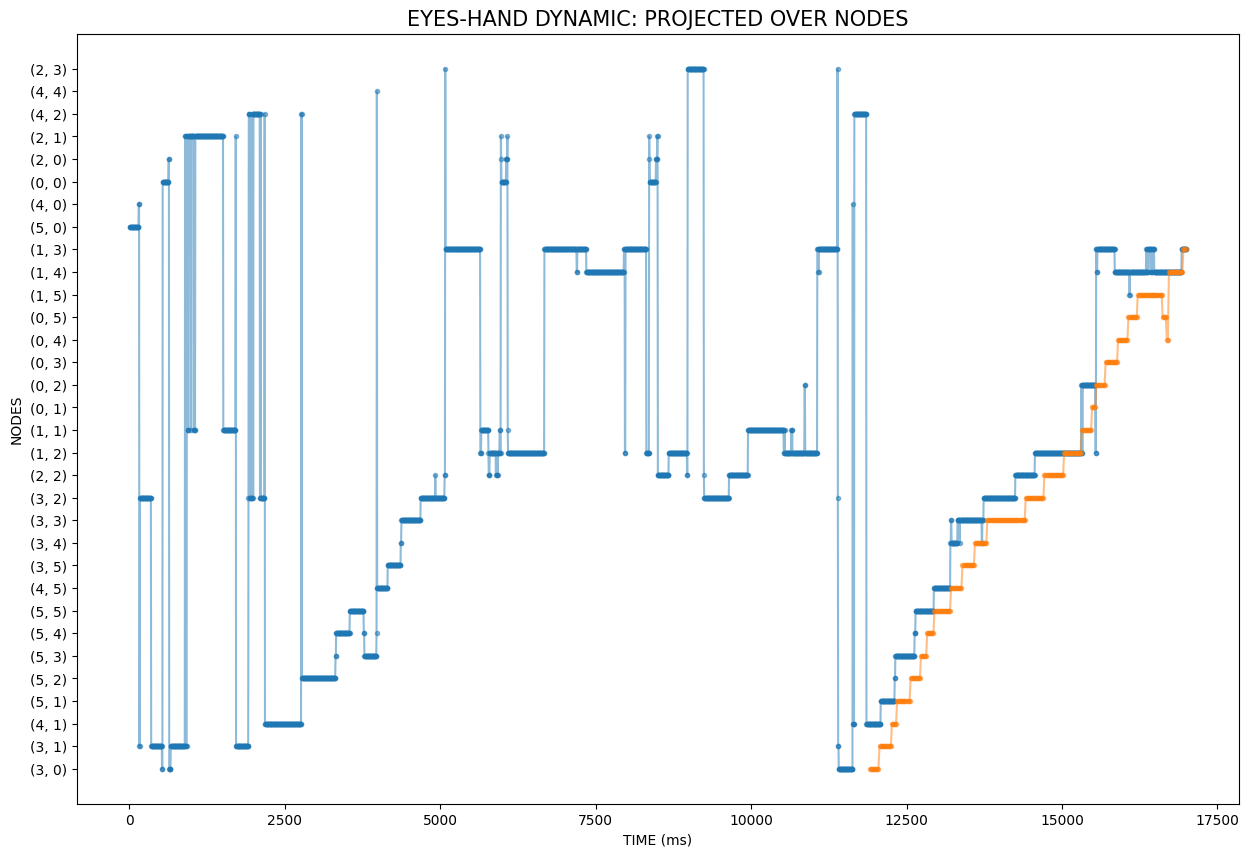

In [ ]:
#Plot the column EYE_FIRST_CLOSEST_NODE vs the column t
trialMask = (df.TRIAL_INDEX == TRIAL_INDEX)
fixMask = (df.TYPE == "FIX")
touchMask = (df.TYPE == "TOUCH")
start = 0
nodesListE = list(df[(df.t > start) & trialMask & fixMask].EYE_FIRST_CLOSEST_NODE.unique())
nodesListT = list(df[(df.t > start) & trialMask & touchMask].TOUCH_FIRST_CLOSEST_NODE.unique())
nodesListET = list(set(nodesListE) & set(nodesListT))

noMissingTouchMask = (df.MISSING_TOUCH == False)
noBacktrackMask = (df.BACKTRACK == False)
noPauseMask = (df.PAUSE == False)
draggingMask = (df.DRAGGING == True)


fig = plt.figure(figsize=(15, 10))
plt.plot([0]*len(nodesListT), nodesListT, "w")
plt.plot(df[(df.t > start) & trialMask & fixMask ].t, df[(df.t > start) & trialMask & fixMask].EYE_FIRST_CLOSEST_NODE, label = "FIX", marker = ".", alpha = 0.5)
plt.plot(df[(df.t > start) & trialMask & touchMask].t, df[(df.t > start) & trialMask & touchMask].TOUCH_FIRST_CLOSEST_NODE, label = "TOUCH", marker = ".", alpha = 0.5)
plt.xlabel("TIME (ms)")
plt.ylabel("NODES")
plt.title("EYES-HAND DYNAMIC: PROJECTED OVER NODES", fontsize = 15)
#plt.savefig("./IMAGES/EYES-HAND_DYNAMIC.png", dpi = 300)
plt.show()

In [40]:
#Load the data
timeLsP = np.load("./timeLs.npy", allow_pickle=True)
distanceLsP = np.load("./distanceLs.npy", allow_pickle=True)
derivativeLsP = np.load("./derivativeLs.npy", allow_pickle=True)

In [42]:
tTest = []
pValues = []
for i in range(len(timeLsP[0])):
    t, p = stats.ttest_1samp(np.array(derivativeLsP)[:,i], 0)
    tTest.append(t)
    pValues.append(p)

In [106]:
#Load the data
distanceLs = np.load("./distanceLs2.npy", allow_pickle=True)

In [61]:
#Plot the column EYE_FIRST_CLOSEST_NODE vs the column t
trialMask = (df.TRIAL_INDEX == TRIAL_INDEX)
fixMask = (df.TYPE == "FIX")
touchMask = (df.TYPE == "TOUCH")
start = 0
nodesListE = list(df[(df.t > start) & trialMask & fixMask].EYE_FIRST_CLOSEST_NODE.unique())
nodesListT = list(df[(df.t > start) & trialMask & touchMask].TOUCH_FIRST_CLOSEST_NODE.unique())
nodesListET = list(set(nodesListE) & set(nodesListT))

noMissingTouchMask = (df.MISSING_TOUCH == False)
noBacktrackMask = (df.BACKTRACK == False)
noPauseMask = (df.PAUSE == False)
draggingMask = (df.DRAGGING == True)
movementMask = (df.BEFORE_MOVEMENT == False)

# Filter data based on masks
dfFix = df[trialMask & fixMask & movementMask].reset_index(drop=False)
dfTouch = df[trialMask & touchMask & movementMask].reset_index(drop=False)

# Interpolate the x and y coordinates of dfFix and dfTouch
fFixX = interp1d(dfFix.t, dfFix.x, kind='linear')
fFixY = interp1d(dfFix.t, dfFix.y, kind='linear')
fTouchX = interp1d(dfTouch.t, dfTouch.x, kind='linear')
fTouchY = interp1d(dfTouch.t, dfTouch.y, kind='linear')

# Create a new time array
tnew = np.arange(max(dfFix.t.min(), dfTouch.t.min()), min(dfFix.t.max(), dfTouch.t.max()), 10)

# Compute the difference between the interpolated x and y coordinates of dfFix and dfTouch at the same time
diffX = fFixX(tnew) - fTouchX(tnew)
diffY = fFixY(tnew) - fTouchY(tnew)

# Compute distance
distance = np.sqrt(diffX**2 + diffY**2)
#Compute the meanDerivative
meanDerivative = np.mean(derivativeLsP, axis=0)
stdDerivative = np.std(derivativeLsP, axis=0)
semDerivative = np.std(derivativeLsP, axis=0)/np.sqrt(len(derivativeLsP))

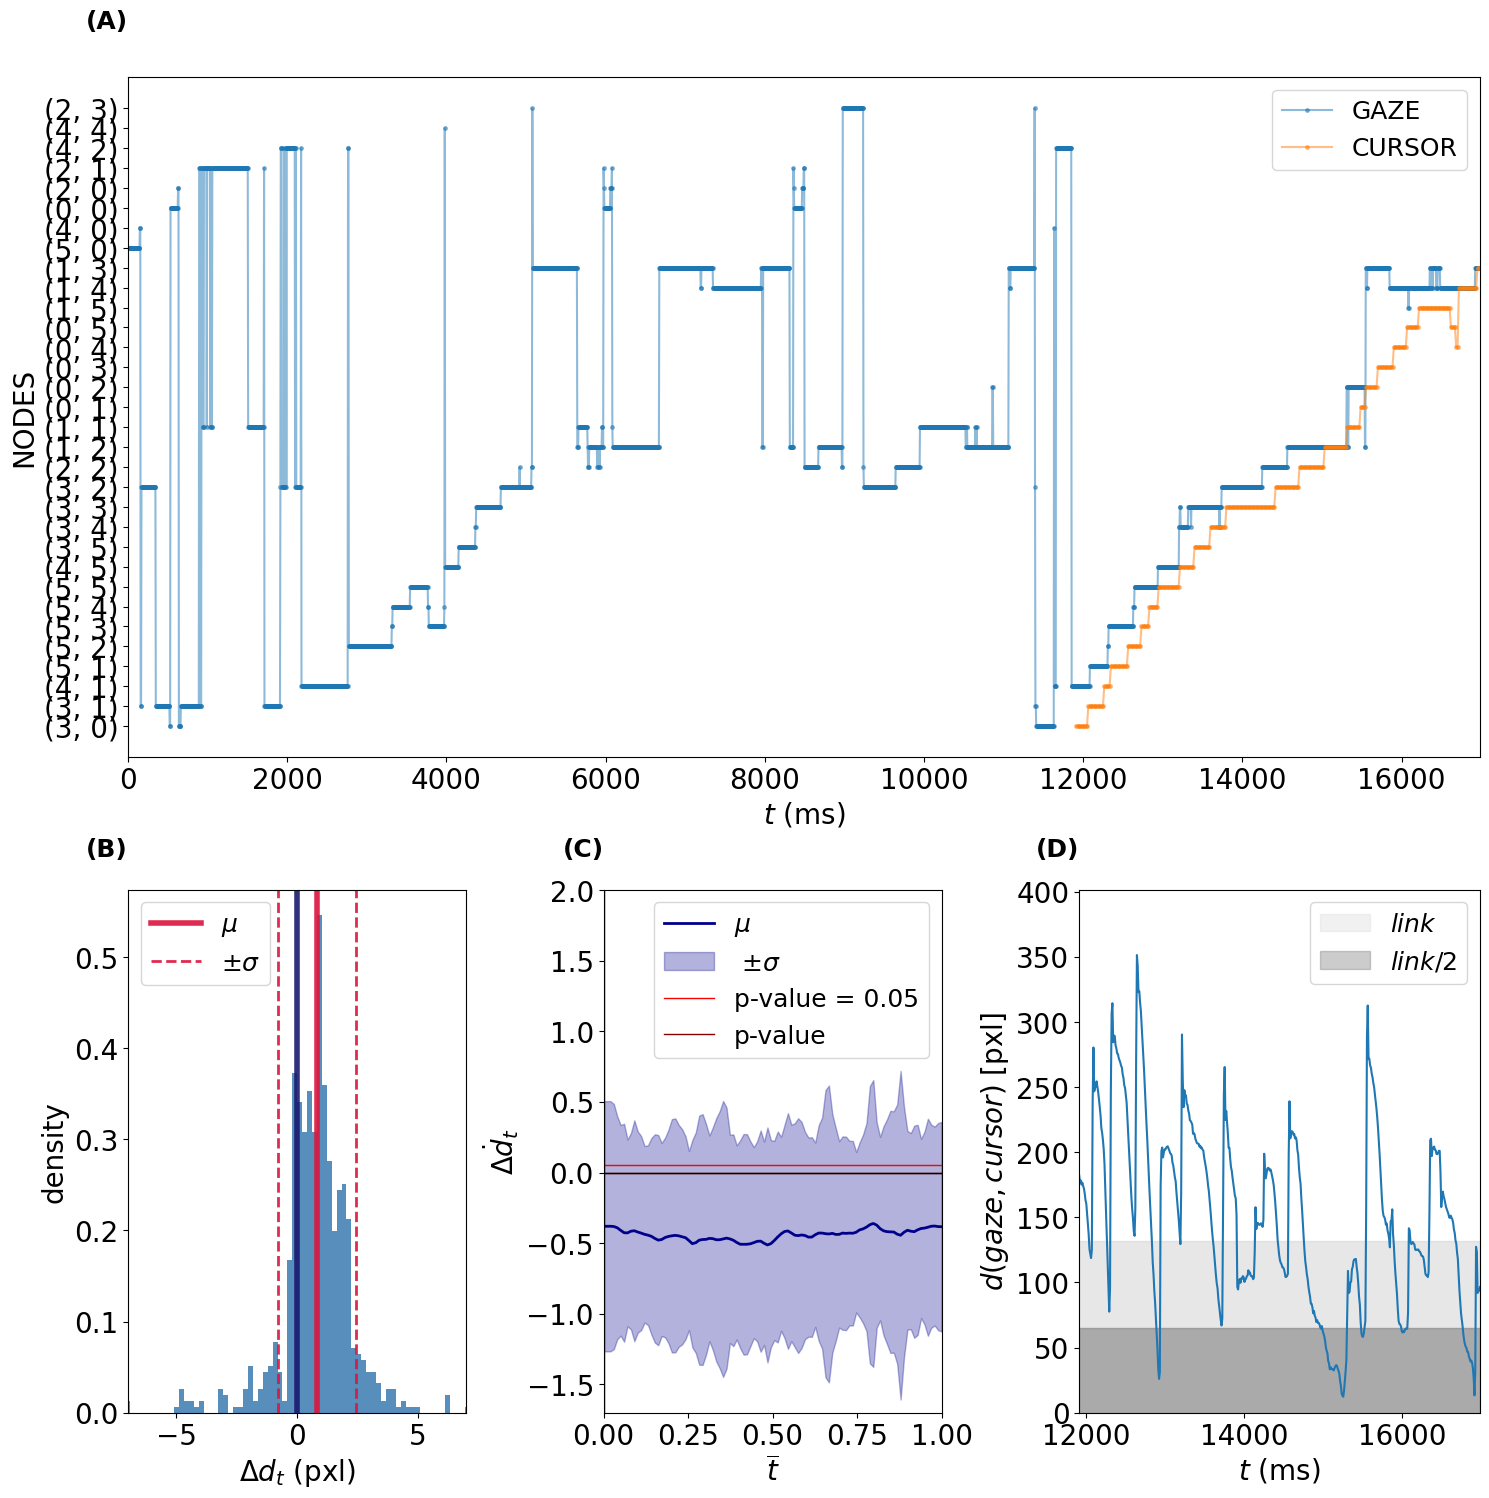

In [ ]:
fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(2, 3, height_ratios=[1.3, 1], width_ratios=[.5, .5,  .593])

# First subplot (ax0)
ax0 = fig.add_subplot(gs[0, :])  # Span all columns in the first row
ax0.plot([0]*len(nodesListT), nodesListT, "w")
ax0.plot(df[(df.t > start) & trialMask & fixMask].t, df[(df.t > start) & trialMask & fixMask].EYE_FIRST_CLOSEST_NODE, label="GAZE", marker=".", alpha=0.5, markersize=5)
ax0.plot(df[(df.t > start) & trialMask & touchMask].t, df[(df.t > start) & trialMask & touchMask].TOUCH_FIRST_CLOSEST_NODE, label="CURSOR", marker=".", alpha=0.5, markersize=5)
ax0.set_xlabel("$t$ (ms)", fontsize=20)
ax0.set_ylabel("NODES", fontsize=20)
ax0.set_xlim(0, tnew.max())  # Ensure x-axis limits are defined
ax0.legend(fontsize=18)
ax0.tick_params(axis='x', labelsize=20)
ax0.tick_params(axis='y', labelsize=20)

# Second subplot (ax2)
ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(timeLsP[0], meanDerivative, color="darkblue", linewidth=2, label="$\mu$")
ax2.fill_between(timeLsP[0], meanDerivative-stdDerivative, meanDerivative+stdDerivative, color="darkblue", alpha=0.3, label=" $\pm \sigma$")
#ax2.fill_between(timeLsP[0], meanDerivative-semDerivative, meanDerivative+semDerivative, color="darkblue", alpha=0.9, label="STANDARD ERROR")
ax2.set_xlabel("$\overline{t}$", fontsize=20)
ax2.set_ylabel("$\dot{\Delta d_{t}} $", fontsize=20)
ax2.axhline(0.05, color="red", linewidth=1, label="p-value = 0.05")
ax2.plot(timeLsP[0], pValues, color="darkred", linewidth=1, label="p-value")
ax2.axhline(0, color="black", linewidth=1)
ax2.axvline(0, color="black", linewidth=1)
ax2.set_xlim(timeLsP[0].min(), timeLsP[0].max())  # Explicit x-limits
ax2.set_ylim(-1.7, 2)
ax2.legend(fontsize=18)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)

# Third subplot (ax1)
ax1 = fig.add_subplot(gs[1, 2])  # Share x-axis with ax2
ax1.plot(tnew, distance)
ax1.set_xlabel("$t$ (ms)", fontsize=20)
ax1.set_ylabel("$d(gaze,cursor)$ [pxl]", fontsize=20)
ax1.set_ylim(0, diffY.max() + 50)
ax1.set_xlim(tnew.min(), tnew.max())  # Explicit x-limits
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

# Filling between for shading
for i in range(2):
    ax1.fill_between(tnew, -132, 132, color='lightgray', alpha=0.3, label='$link$')
    ax1.fill_between(tnew, -65, 65, color='gray', alpha=0.4, label='$link/2$')
    if i == 0:
        ax1.legend(loc='upper right', fontsize=18)

# Fourth subplot (ax3)
ax3 = fig.add_subplot(gs[1, 0]) 
ax3.hist(distanceLs, bins = 100, color="steelblue", alpha=0.9, density=True)
#plot the mean and the standard deviation
ax3.axvline(np.mean(distanceLs), color="crimson", linewidth=4,alpha=0.9, label="$\mu$")
ax3.axvline(np.mean(distanceLs) + np.std(distanceLs), color="crimson", linewidth=2, linestyle="--", alpha=0.9, label="$\pm \sigma$")
ax3.axvline(np.mean(distanceLs) - np.std(distanceLs), color="crimson", linewidth=2, linestyle="--",alpha=0.9)
ax3.axvline(0, color="midnightblue", linewidth=4, alpha=0.9)# label="ZERO")
ax3.set_xlim(-7, 7)
#Set xticks font size
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.legend(fontsize=18)
ax3.set_xlabel("$\Delta d_{t}$ (pxl)", fontsize=20)
ax3.set_ylabel("density", fontsize=20)

#Put letters on the subplots
ax0.text(-0.0, 1.1, "(A)", transform=ax0.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
ax2.text(0.0, 1.1,  "(C)", transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
ax1.text(-0.0, 1.1, "(D)", transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
ax3.text(-0.0, 1.1, "(B)", transform=ax3.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
plt.tight_layout()
plt.savefig("./FIGURE2PROVA.png", dpi=300)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


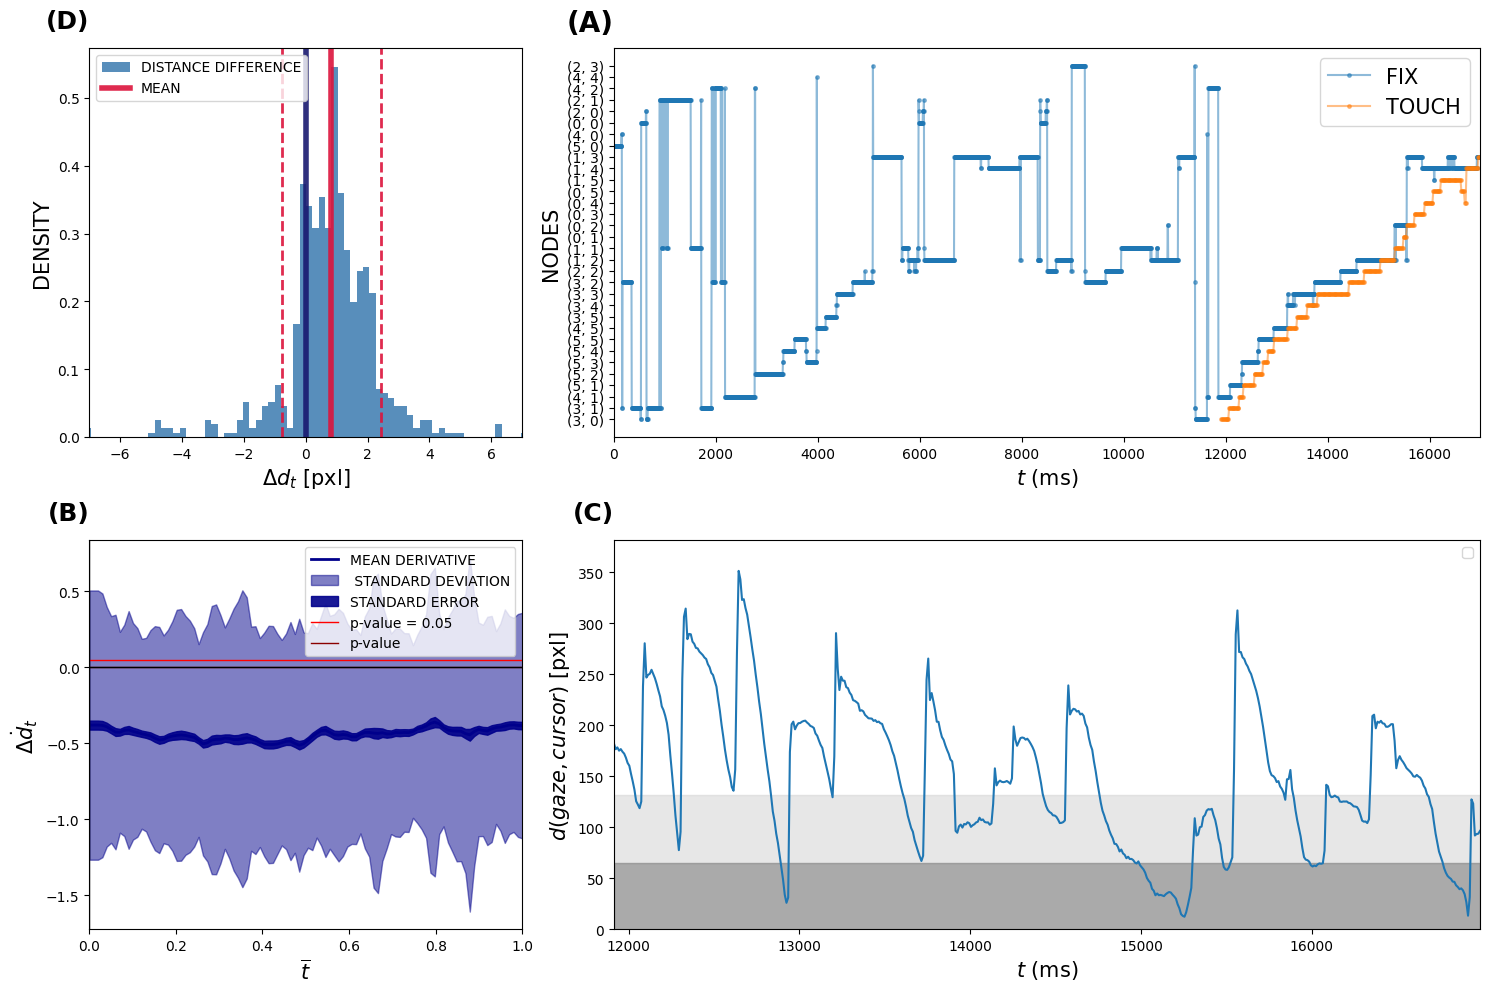

In [169]:
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[.5,1])

# First subplot (ax0)
ax0 = fig.add_subplot(gs[0, 1])  # Span all columns in the first row
ax0.plot([0]*len(nodesListT), nodesListT, "w")
ax0.plot(df[(df.t > start) & trialMask & fixMask].t, df[(df.t > start) & trialMask & fixMask].EYE_FIRST_CLOSEST_NODE, label="FIX", marker=".", alpha=0.5, markersize=5)
ax0.plot(df[(df.t > start) & trialMask & touchMask].t, df[(df.t > start) & trialMask & touchMask].TOUCH_FIRST_CLOSEST_NODE, label="TOUCH", marker=".", alpha=0.5, markersize=5)
ax0.set_xlabel("$t$ (ms)", fontsize=15)
ax0.set_ylabel("NODES", fontsize=15)
ax0.set_xlim(0, tnew.max())  # Ensure x-axis limits are defined
ax0.legend(fontsize=15)

# Second subplot (ax2)
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(timeLsP[0], meanDerivative, color="darkblue", linewidth=2, label="MEAN DERIVATIVE")
ax2.fill_between(timeLsP[0], meanDerivative-stdDerivative, meanDerivative+stdDerivative, color="darkblue", alpha=0.5, label=" STANDARD DEVIATION")
ax2.fill_between(timeLsP[0], meanDerivative-semDerivative, meanDerivative+semDerivative, color="darkblue", alpha=0.9, label="STANDARD ERROR")
ax2.set_xlabel("$\overline{t}$", fontsize=15)
ax2.set_ylabel("$\dot{\Delta d_{t}} $", fontsize=15)
ax2.axhline(0.05, color="red", linewidth=1, label="p-value = 0.05")
ax2.plot(timeLsP[0], pValues, color="darkred", linewidth=1, label="p-value")
ax2.axhline(0, color="black", linewidth=1)
ax2.axvline(0, color="black", linewidth=1)
ax2.set_xlim(timeLsP[0].min(), timeLsP[0].max())  # Explicit x-limits
ax2.legend()

# Third subplot (ax1)
ax1 = fig.add_subplot(gs[1, 1])
ax1.plot(tnew, distance)
ax1.set_xlabel("$t$ (ms)", fontsize=15)
ax1.set_ylabel("$d(gaze,cursor)$ [pxl]", fontsize=15)
ax1.set_ylim(0, diffY.max() + 30)
ax1.set_xlim(tnew.min(), tnew.max())  # Explicit x-limits
ax1.legend()

# Filling between for shading
for i in range(2):
    ax1.fill_between(tnew, -132, 132, color='lightgray', alpha=0.3, label='Link distance')
    ax1.fill_between(tnew, -65, 65, color='gray', alpha=0.4, label='half Link distance')


# Fourth subplot (ax3)
ax3 = fig.add_subplot(gs[0, 0]) 
ax3.hist(distanceLs, bins = 100, color="steelblue", alpha=0.9, density=True, label="DISTANCE DIFFERENCE")
#plot the mean and the standard deviation
ax3.axvline(np.mean(distanceLs), color="crimson", linewidth=4,alpha=0.9, label="MEAN")
ax3.axvline(np.mean(distanceLs) + np.std(distanceLs), color="crimson", linewidth=2, linestyle="--", alpha=0.9)
ax3.axvline(np.mean(distanceLs) - np.std(distanceLs), color="crimson", linewidth=2, linestyle="--",alpha=0.9)
ax3.axvline(0, color="midnightblue", linewidth=4, alpha=0.9)# label="ZERO")
ax3.set_xlim(-7, 7)
ax3.legend()
ax3.set_xlabel("$\Delta d_{t}$ [pxl]", fontsize=15)
ax3.set_ylabel("DENSITY", fontsize=15)

#Vertical axis in 12000 ms
#plt.savefig("./FIGURE2PROVA.png", dpi=300)

#Put letters on the subplots
ax0.text(-0.0, 1.1, "(A)", transform=ax0.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
ax2.text(0.0, 1.1, "(B)", transform=ax2.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
ax1.text(-0.0, 1.1, "(C)", transform=ax1.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
ax3.text(-0.0, 1.1, "(D)", transform=ax3.transAxes, fontsize=18, fontweight='bold', va='top', ha='right')
plt.tight_layout()
#plt.savefig("./FIGURE2PROVA.png", dpi=300)
plt.show()

## VIEW TIME, EXECUTION TIME ETC.

In [54]:
df5 = pd.read_csv('/Users/Mattia/Desktop/OngoingProjects/ThinkAheadBACKUP/ANALISI_THINK_AHEAD/SYNOPSIS/dfv5.csv')

In [57]:
#Import minAgentDict.json which is a dictionary that contains the minimum number of agents for each TrialID
with open('/Users/Mattia/Desktop/OngoingProjects/ThinkAheadBACKUP/ANALISI_THINK_AHEAD/SYNOPSIS/minAgentDict.json') as json_file:
    minAgentDict = json.load(json_file)
#Make a dataframe with the minimum number of agents for each TrialID
df_minAgents = pd.DataFrame(minAgentDict.items(), columns=["TrialID", "MinAgents"])
for TrialID in df_minAgents.TrialID.unique():
    df5.loc[df5["TrialID"] == TrialID, "DepthIDRevised"] = df_minAgents[df_minAgents["TrialID"] == TrialID]["MinAgents"].values[0]

In [63]:
mapName = []
ViewTime = []
ExecutionTime = []
PauseTime = []
BacktrackTime = []
MissingTouchTime = []
Level = []
Depth = []
subjList = []
for subjName in subjNames[:1]:
    print(subjName)
    df = pd.read_csv("./OUTPUT/" + subjName +"dfSampleVis.csv", low_memory=False)
    beforeMovementMask = (df.BEFORE_MOVEMENT == True)
    backtrackingMask = (df.BACKTRACK == True)
    missingTouchMask = (df.MISSING_TOUCH == True)
    pauseMask = (df.PAUSE == True)

    for problem in problemList:
        subjList.append(subjName)
        TRIAL_INDEX = df[df.MAPNAME == problem[:-5]].TRIAL_INDEX.iloc[0]
        trialMask = (df.TRIAL_INDEX == TRIAL_INDEX)
        #ViewTime
        view_time = df[trialMask & beforeMovementMask].t.max() - df[trialMask & beforeMovementMask].t.min()
        ViewTime.append(view_time)
        #BacktrackingTime
        BacktrackIndexes = df[trialMask & backtrackingMask].index
        backtracking_time = np.sum([interval[-1] -interval[0] for interval in Utilities.split_into_consecutive_sublists(BacktrackIndexes)])
        BacktrackTime.append(backtracking_time)
        #MissingTouchTime
        MissingTouchIndexes = df[trialMask & missingTouchMask].index
        missing_touch_time = np.sum([interval[-1] -interval[0] for interval in Utilities.split_into_consecutive_sublists(MissingTouchIndexes)])
        MissingTouchTime.append(missing_touch_time)
        #PauseTime
        PauseIndexes = df[trialMask & pauseMask].index
        pause_time = np.sum([interval[-1] -interval[0] for interval in Utilities.split_into_consecutive_sublists(PauseIndexes)])
        PauseTime.append(pause_time)
        #ExecutionTime
        total_time = df[trialMask].t.max() - df[trialMask].t.min()
        execution_time = total_time - view_time - backtracking_time - missing_touch_time - pause_time
        ExecutionTime.append(execution_time)

        #Level
        level = df5[df5.TrialID == problem[:-10]].Level.iloc[0]
        Level.append(level)
        #Depth
        depth = df5[df5.TrialID == problem[:-10]].DepthIDRevised.iloc[0]
        Depth.append(depth)

#Create a dataframe with the results
dfResults = pd.DataFrame({"MAPNAME": problemList, "ViewTime": ViewTime, "ExecutionTime": ExecutionTime, "PauseTime": PauseTime, "BacktrackTime": BacktrackTime, "MissingTouchTime": MissingTouchTime, "Level": Level, "Depth": Depth})

STUD4


/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/1114339210.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])


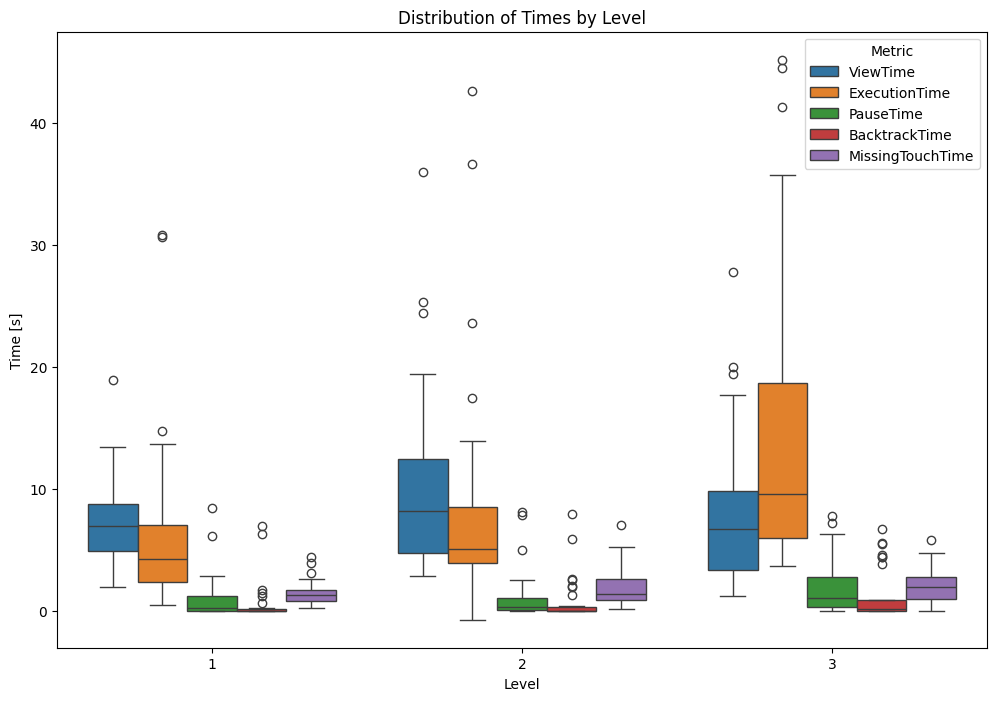

In [71]:
metrics = ["ViewTime", "ExecutionTime", "PauseTime", "BacktrackTime", "MissingTouchTime"]
df_melted = dfResults.melt(id_vars=["Level"], value_vars=metrics, var_name="Metric", value_name="Time")

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="Level", y="Time", hue="Metric", data=df_melted)
plt.title('Distribution of Times by Level')
plt.xlabel('Level')
plt.ylabel('Time [s]')
plt.legend(title='Metric')
plt.xlim(0.5,3.5)
#Divide yticks by 1000
ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])
plt.show()

/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/3506937612.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])


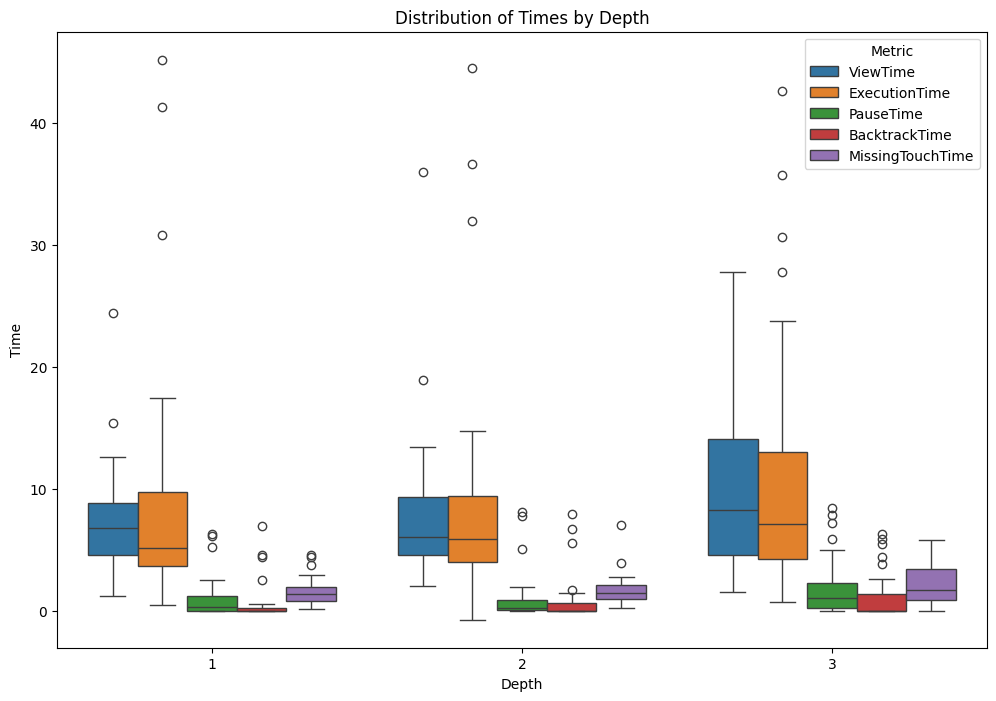

In [78]:
metrics = ["ViewTime", "ExecutionTime", "PauseTime", "BacktrackTime", "MissingTouchTime"]
df_melted = dfResults.melt(id_vars=["Depth"], value_vars=metrics, var_name="Metric", value_name="Time")

plt.figure(figsize=(12, 8))
ax = sns.boxplot(x="Depth", y="Time", hue="Metric", data=df_melted)
plt.title('Distribution of Times by Depth')
plt.xlabel('Depth')
plt.ylabel('Time')
plt.legend(title='Metric')
#Divide yticks by 1000
ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])
#Set xticks as 1, 2, 3
plt.xticks(range(3), range(1, 4))
plt.show()

/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/4209904293.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")
/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/4209904293.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])


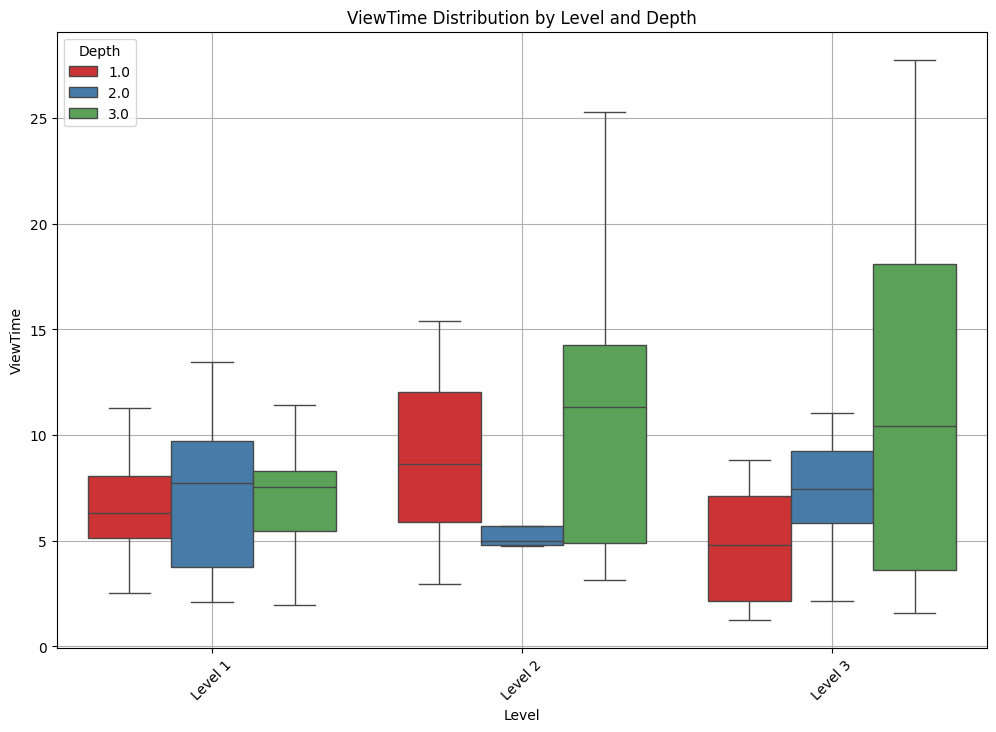

In [90]:
df_filtered = dfResults[dfResults['Level'] != 0]

plt.figure(figsize=(12, 8))

# Create a new column for plotting that just includes 'Level' (since we'll use 'hue' for 'Depth')
df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")

# Plotting the ViewTime for each Depth within each Level as separate boxes
ax = sns.boxplot(x='Level-Str', y='ViewTime', hue='Depth', data=df_filtered.sort_values(by=['Level', 'Depth']), palette="Set1", showfliers=False)
plt.title('ViewTime Distribution by Level and Depth')
plt.xlabel('Level')
plt.ylabel('ViewTime')
plt.legend(title='Depth')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.grid(True)
ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])
plt.show()

/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/2662889460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")
/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/2662889460.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])


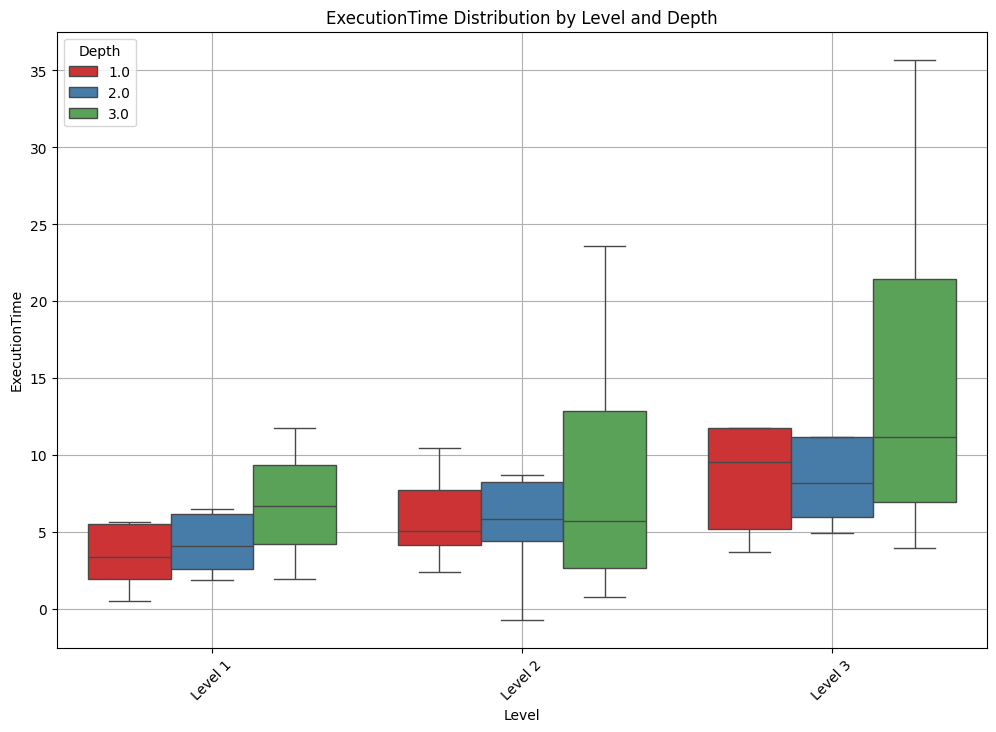

In [95]:
df_filtered = dfResults[dfResults['Level'] != 0]

plt.figure(figsize=(12, 8))

# Create a new column for plotting that just includes 'Level' (since we'll use 'hue' for 'Depth')
df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")

# Plotting the ViewTime for each Depth within each Level as separate boxes
ax = sns.boxplot(x='Level-Str', y='ExecutionTime', hue='Depth', data=df_filtered.sort_values(by=['Level', 'Depth']), palette="Set1", showfliers=False)
plt.title('ExecutionTime Distribution by Level and Depth')
plt.xlabel('Level')
plt.ylabel('ExecutionTime')
plt.legend(title='Depth')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.grid(True)
ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])
plt.show()

/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/2117730632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")
/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/2117730632.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])


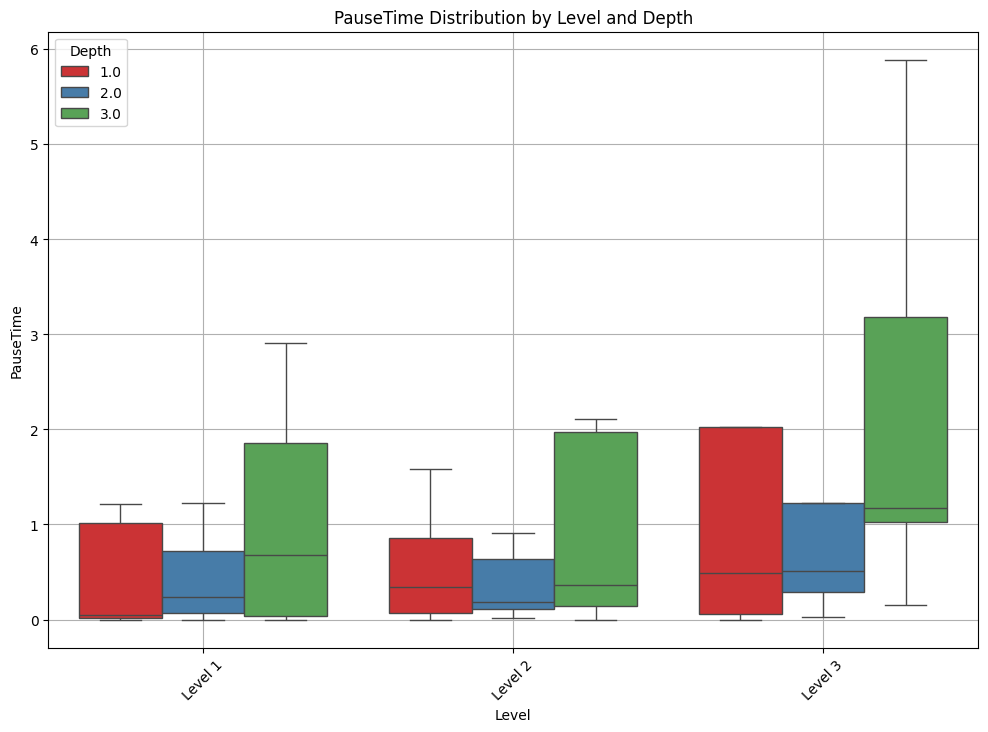

In [92]:
df_filtered = dfResults[dfResults['Level'] != 0]

plt.figure(figsize=(12, 8))

# Create a new column for plotting that just includes 'Level' (since we'll use 'hue' for 'Depth')
df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")

# Plotting the ViewTime for each Depth within each Level as separate boxes
ax = sns.boxplot(x='Level-Str', y='PauseTime', hue='Depth', data=df_filtered.sort_values(by=['Level', 'Depth']), palette="Set1", showfliers=False)
plt.title('PauseTime Distribution by Level and Depth')
plt.xlabel('Level')
plt.ylabel('PauseTime')
plt.legend(title='Depth')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.grid(True)
ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])
plt.show()

/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/1668421461.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")
/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/1668421461.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])


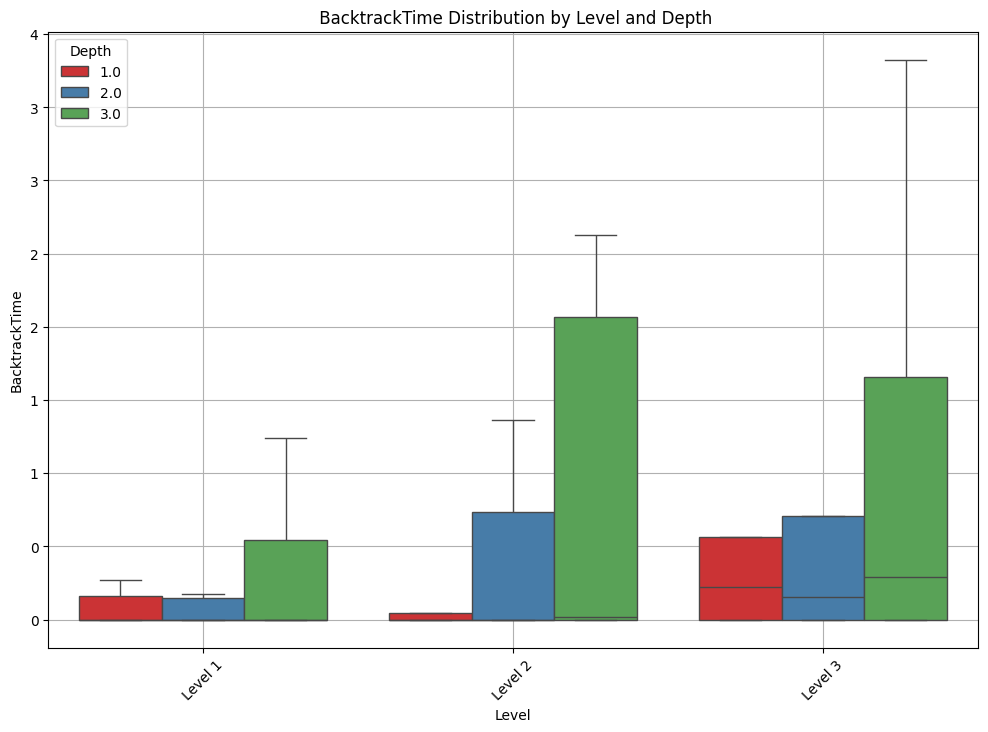

In [93]:
df_filtered = dfResults[dfResults['Level'] != 0]

plt.figure(figsize=(12, 8))

# Create a new column for plotting that just includes 'Level' (since we'll use 'hue' for 'Depth')
df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")

# Plotting the ViewTime for each Depth within each Level as separate boxes
ax = sns.boxplot(x='Level-Str', y='BacktrackTime', hue='Depth', data=df_filtered.sort_values(by=['Level', 'Depth']), palette="Set1", showfliers=False)
plt.title(' BacktrackTime Distribution by Level and Depth')
plt.xlabel('Level')
plt.ylabel('BacktrackTime')
plt.legend(title='Depth')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.grid(True)
ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])
plt.show()

/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/2893924853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")
/var/folders/vp/rnmw2p3j1l519_mx9crnm40c0000gr/T/ipykernel_38875/2893924853.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])


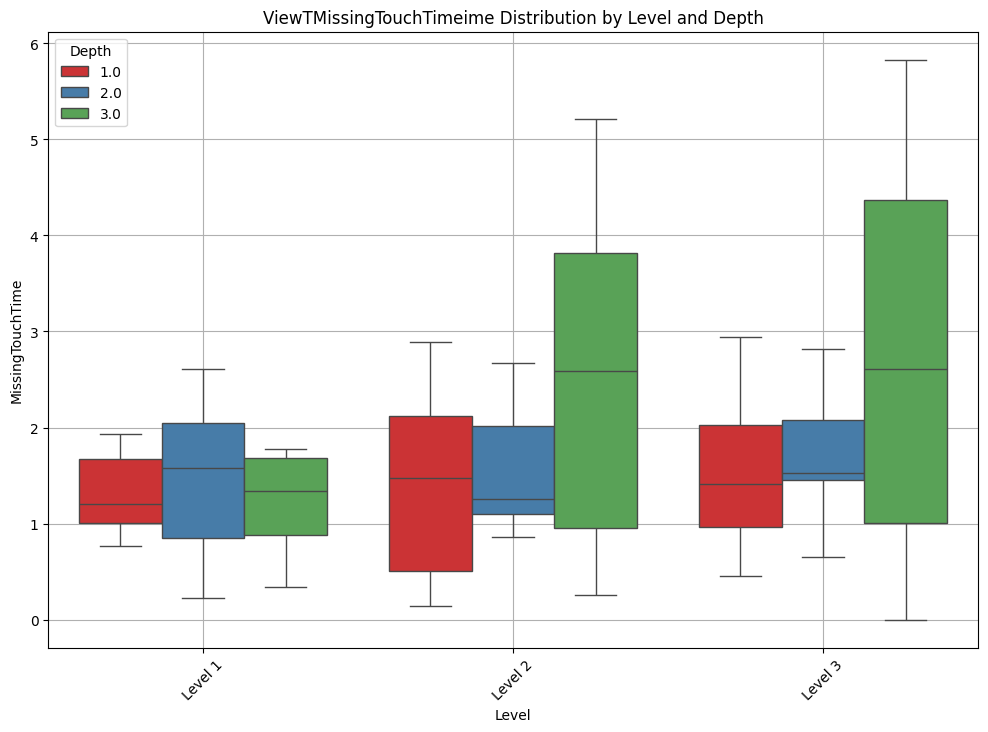

In [94]:
df_filtered = dfResults[dfResults['Level'] != 0]

plt.figure(figsize=(12, 8))

# Create a new column for plotting that just includes 'Level' (since we'll use 'hue' for 'Depth')
df_filtered['Level-Str'] = df_filtered['Level'].apply(lambda x: f"Level {x}")

# Plotting the ViewTime for each Depth within each Level as separate boxes
ax = sns.boxplot(x='Level-Str', y='MissingTouchTime', hue='Depth', data=df_filtered.sort_values(by=['Level', 'Depth']), palette="Set1", showfliers=False)
plt.title('ViewTMissingTouchTimeime Distribution by Level and Depth')
plt.xlabel('Level')
plt.ylabel('MissingTouchTime')
plt.legend(title='Depth')
plt.xticks(rotation=45)  # Rotate x labels for better readability if necessary
plt.grid(True)
ax.set_yticklabels([str(int(y/1000)) for y in ax.get_yticks()])
plt.show()

##### get the trial index

In [ ]:
TRIAL_INDEX = 4

##### splitting fixations into consecutive sublists 

In [ ]:
consecutiveFixLs = Utilities.split_into_consecutive_sublists(df[(df.BACKTRACK) & (df.TRIAL_INDEX == TRIAL_INDEX) &  (~df.LABEL_FIX.isna())].LABEL_FIX.unique())

##### find the first fixation of the consecutive sublists

In [ ]:
firsts = [l[0] for l in consecutiveFixLs]
print(firsts)

[33.0]


##### identify the first change in the activeNode values for the firsts fixations

In [ ]:
first = firsts[0]
changeMask = df[(df.TRIAL_INDEX == TRIAL_INDEX) & (df.LABEL_FIX == first)]["activeNode"] != df[(df.TRIAL_INDEX == TRIAL_INDEX) & (df.LABEL_FIX == first)]["activeNode"].shift(1)
changings = df[(df.TRIAL_INDEX == TRIAL_INDEX) & (df.LABEL_FIX == first)]["activeNode"][changeMask]
changedIndexes = changings.index.values

In [ ]:
removalIndex = changedIndexes[1]

In [ ]:
#Get the starting condition
startCond = Utilities.parse_string(df[(df.TRIAL_INDEX == TRIAL_INDEX) & (df.LABEL_FIX == first)]["activeNode"].iloc[0])

#Get the changed condition
backtracked = Utilities.parse_string(changings.values[1])

#Get the tuples that changed
changedTuples = [t for t in startCond if t not in backtracked]

[(0, 3)]


##### ricerca il tempo di annullamento

In [ ]:
tRemoval = df.loc[removalIndex, "t"]

##### ricerca tempo di attivazione

In [ ]:
changeMask = df[(df.TRIAL_INDEX == TRIAL_INDEX)]["activeNode"] != df[(df.TRIAL_INDEX == TRIAL_INDEX)]["activeNode"].shift(1)
changedIndexes = df[(df.TRIAL_INDEX == TRIAL_INDEX)]["activeNode"][changeMask]

In [ ]:
#Get the last index in changedIndexes before changedIndex
tAdd = df.loc[changedIndexes.index.values[np.where(changedIndexes.index.values < removalIndex)[0][-1]], "t"]